In [1]:
from __future__ import division
import numpy as np
import scipy
from scipy import integrate
from numpy import linalg as LA


import matplotlib.pyplot as plt

In [2]:
#import custom functions
#harmonic is assignment function
#sol_frame indexes array same as matlab

from nonlinear_harmonic import *
from sol_frame import *

In [3]:
#define constants
tol = 10**-4
k = 1
xp = [-2,2]

En_start = k
En = En_start

#define x range for eig_funct
dx=0.1
x_frame = sol_frame(xp[0], xp[1], dx)

eig_funct = []
eig_vals = []

In [11]:
count = 0 
gamma = 0.05

A_start = 0.5
A = A_start

#loop through A
for i in range (1,10):
    dA = 0.1
    A = A + dA
    
    for i in range(1,2):
        dEn = k/100
        En = En + dEn
        #loop through and find solution
        for j in range(1, 1000):

            #reset En
            y0 = [0,A]
            p = [k, En, gamma]
            #solve ODE
            sol = integrate.odeint(nonlinear_harmonic, y0, x_frame, args=(p,))

            #pull end value
            end = len(sol)
            end_val = sol[end-1:end, 0:1]

            #check if solution is within tolerance
            if abs(end_val) < tol:
                En
                count = count + 1
                break;

            if i % 2 == 0:
                if end_val < 0:
                    En = En+dEn
                else:
                    En = En-dEn/2
                    dEn = dEn/2
            else:
                if end_val > 0:
                    En = En+dEn
                else:
                    En = En-dEn/2
                    dEn = dEn/2

        y1a = sol[:,0:1]
        y2a = sol[:,1:2]

        #append eigen function to list
        eig_funct.append(y1a)
        #append Eigen value
        eig_vals.append(En)
            
    if count > 1:
        break;
        
#write out solution of asbsolute value eigen funtions
A13 = abs(eig_funct[0])
A13 = A13 / np.trapz(A13, axis=-0, dx=dx)
np.savetxt('A13.dat', A13)

A14 = abs(eig_funct[1])
A14 = A14 / np.trapz(A14, axis=-0, dx=dx)
np.savetxt('A14.dat', A14)

eig1 = eig_vals[0] #/ np.trapz(A1, axis=-0, dx=dx)
eig2 = eig_vals[1] #/ np.trapz(A2, axis=-0, dx=dx)

A15 = np.r_[eig1,eig2]
np.savetxt('A15.dat', A15)

In [12]:
count = 0 
gamma = -0.05

A_start = 0.5
A = A_start

#loop through A
for i in range (1,10):
    dA = 0.1
    A = A + dA
    
    for i in range(1,2):
        dEn = k/100
        En = En + dEn
        #loop through and find solution
        for j in range(1, 1000):

            #reset En
            y0 = [0,A]
            p = [k, En, gamma]
            #solve ODE
            sol = integrate.odeint(nonlinear_harmonic, y0, x_frame, args=(p,))

            #pull end value
            end = len(sol)
            end_val = sol[end-1:end, 0:1]

            #check if solution is within tolerance
            if abs(end_val) < tol:
                En
                count = count + 1
                break;

            if i % 2 == 0:
                if end_val < 0:
                    En = En+dEn
                else:
                    En = En-dEn/2
                    dEn = dEn/2
            else:
                if end_val > 0:
                    En = En+dEn
                else:
                    En = En-dEn/2
                    dEn = dEn/2

        y1a = sol[:,0:1]
        y2a = sol[:,1:2]

        #append eigen function to list
        eig_funct.append(y1a)
        #append Eigen value
        eig_vals.append(En)
            
    if count > 1:
        break;
        
#write out solution of asbsolute value eigen funtions
A16 = abs(eig_funct[0])
A16 = A16 / np.trapz(A16, axis=-0, dx=dx)
np.savetxt('A16.dat', A16)

A17 = abs(eig_funct[1])
A17 = A17 / np.trapz(A17, axis=-0, dx=dx)
np.savetxt('A17.dat', A17)

eig1 = eig_vals[0]
eig2 = eig_vals[1]

A18 = np.r_[eig1,eig2]
np.savetxt('A18.dat', A18)

### Plots

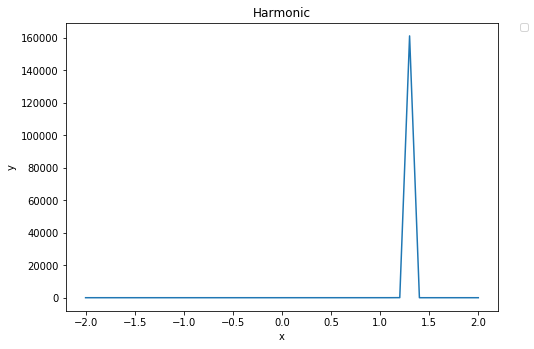

In [6]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[0], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

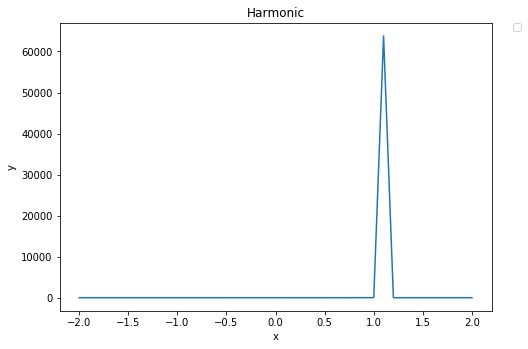

In [7]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[1], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

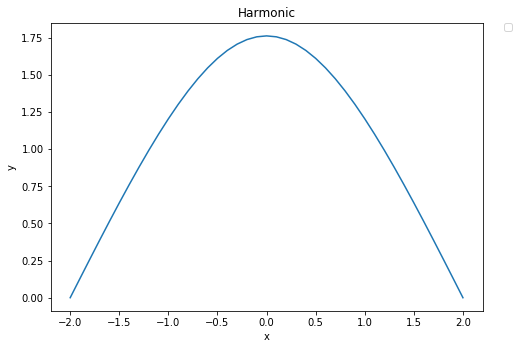

In [8]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[2], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

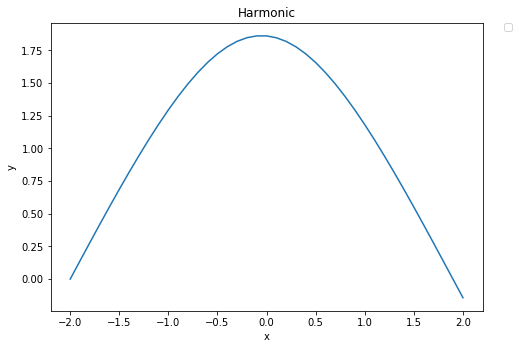

In [9]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[3], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

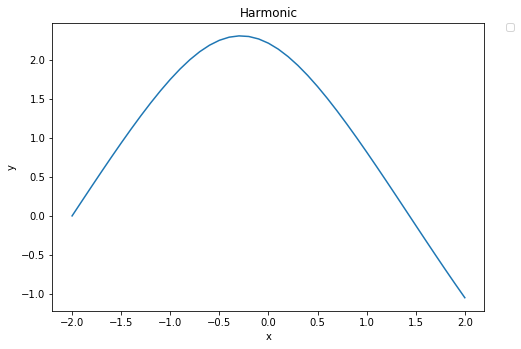

In [10]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[8], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()